## Democracy index Example

In this example we will use SOM to draw some insights from *Democracy Index data* from Wikipedia.

First, let's load the dataset:

In [99]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../..')
from lightSOM import SOM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
%load_ext autoreload

# download from wikipedia and reorganization
democracy_index = pd.read_csv('data/democracy_index.csv')
democracy_index.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category,country_code
0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy,NO
1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy,IS
2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy,SE
3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy,NZ
4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy,DK


The dataset contains a set of of social metrics and a democracy level for each country. 
The goal is to use these metrics as features for our SOM so that we can create a bidimensional space where each country is mapped according to their democracity level.

We will define a set of color for the categories and a country code for each country. 

We are now ready to train our SOM:

In [101]:
feature_names = ['democracy_index', 'electoral_processand_pluralism', 'functioning_of_government',
                 'political_participation', 'political_culture', 'civil_liberties']

X = democracy_index[feature_names].values
target=democracy_index['category'].values
names=democracy_index['country_code'].values

size = 15
som=SOM().create(20, 15, X,lattice='rect', features_names=feature_names, target=target, index=names, pci=True, pbc=False)


som.train(start_learning_rate=1,epochs=10000, verbose=True)

Periodic Boundary Conditions inactive.
The weights will be initialised with PCA.
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.8687376551326872

 topological error: 0.005988023952095809
Training SOM... done!


Exploring Countries map
----

Lets plot each country in a cell that represent the winning neuron on the SOM. We will use the country code instead of the full names. The name of the countries will be colored according to their democracy status.

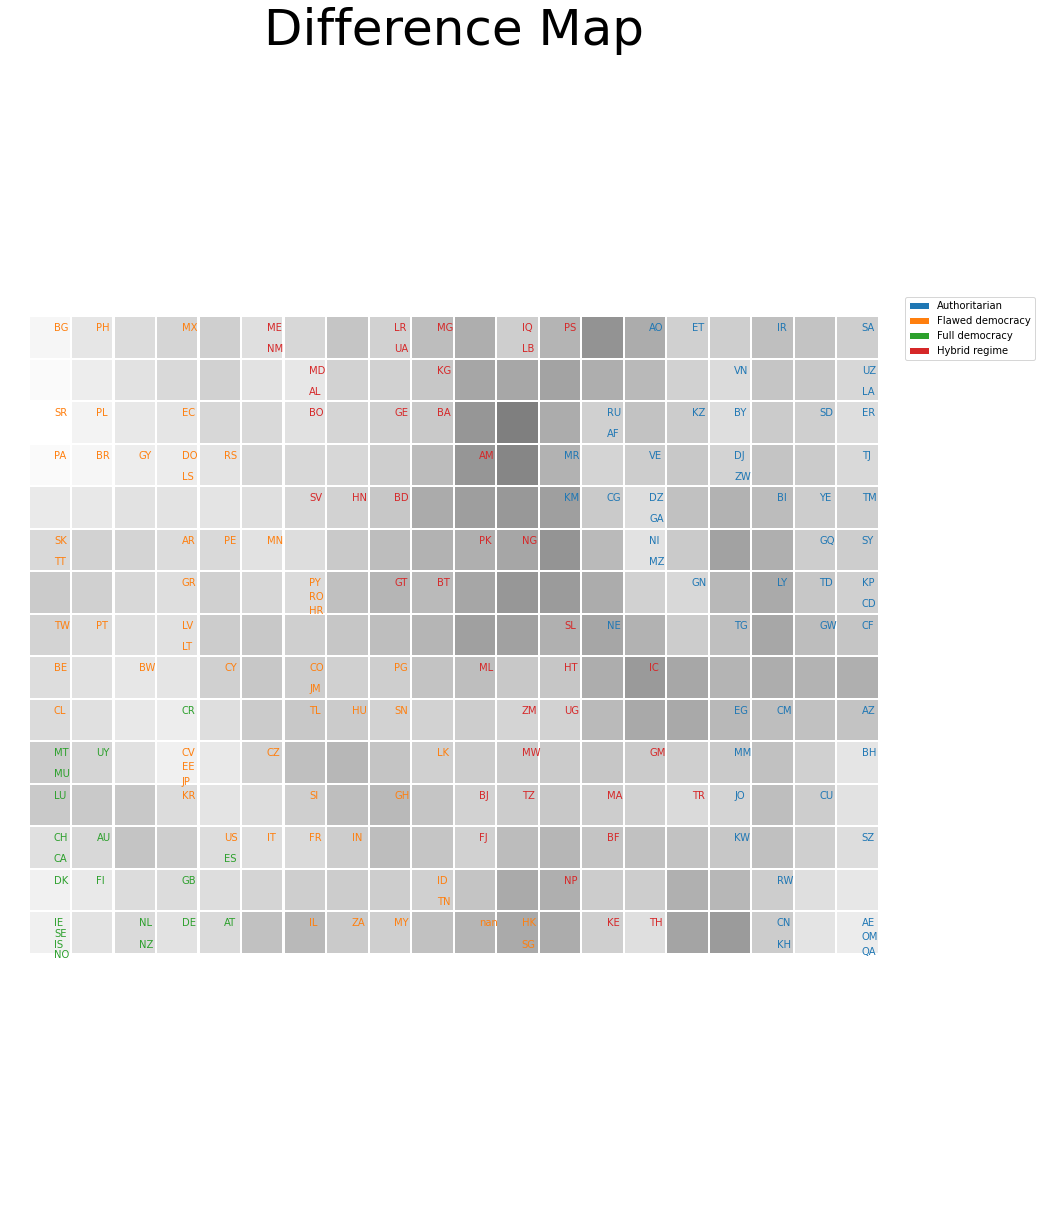

In [102]:
from lightSOM.visualization.som_view import SOMView
vhts  = SOMView(som, 10,10, text_size=10)
vhts.plot_diffs(cmap='gray_r', annotate="names")

Features planes
----

Here we will create a map for each feature used that reflects the magnitude of the weights associated to it for each neuron.

<AxesSubplot:title={'center':'Feature_civil_liberties'}>

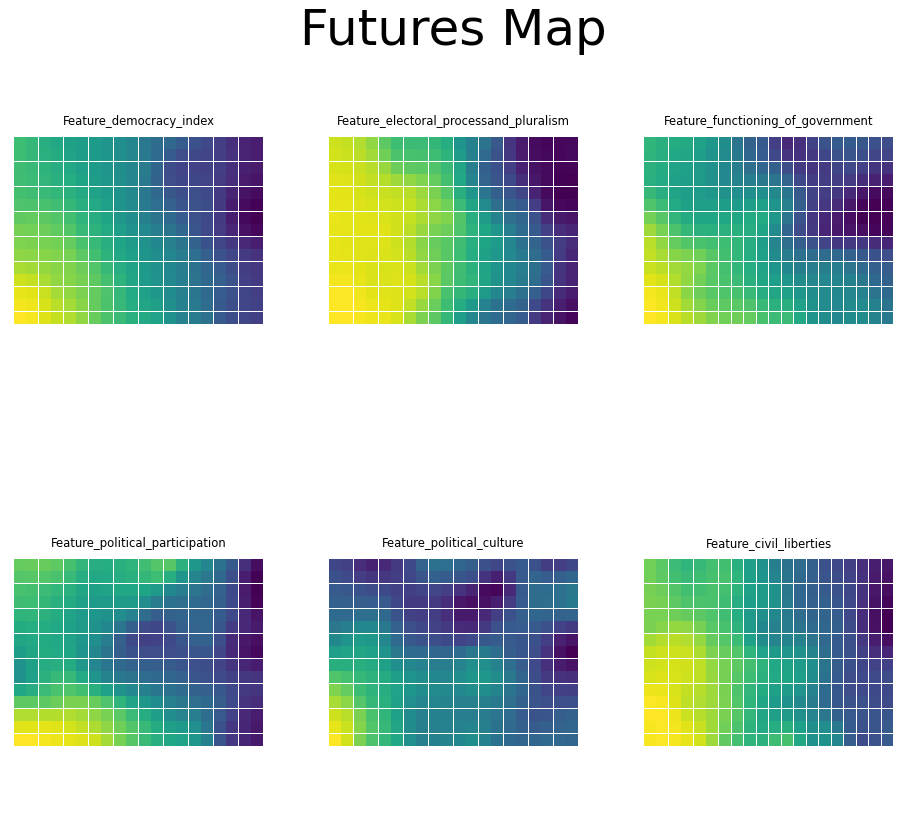

In [103]:
vhts.plot_nodes_maps(col_size=3)

Most relevant feature plane
----

In this map we associate each neuron to the feature with the maximum weight. This segments our map in regions where specific features have high values.

<ipython-input-106-ac9e2af39157>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),


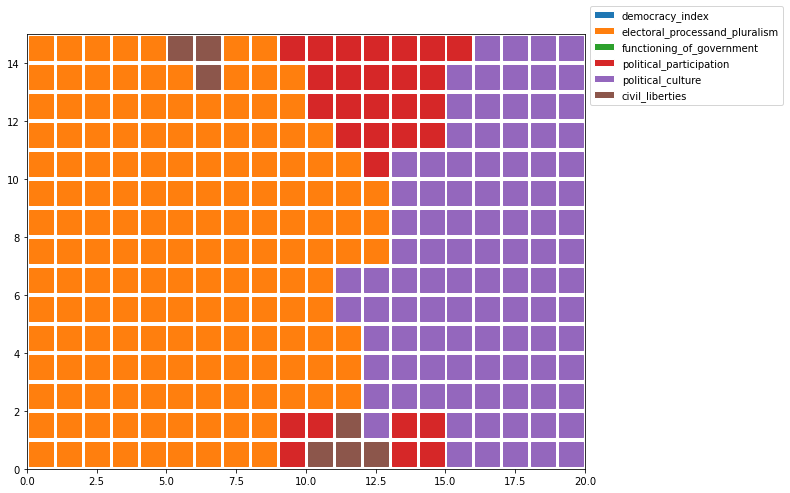

In [106]:
plt.figure(figsize=(10, 8))
for i in np.arange(som.nodes.matrix.shape[1]):
    for j in np.arange(som.nodes.matrix.shape[0]):
        feature = np.argmax(som.nodes.matrix[j, i , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, 20])
plt.ylim([0, 15])
plt.show()

<AxesSubplot:>

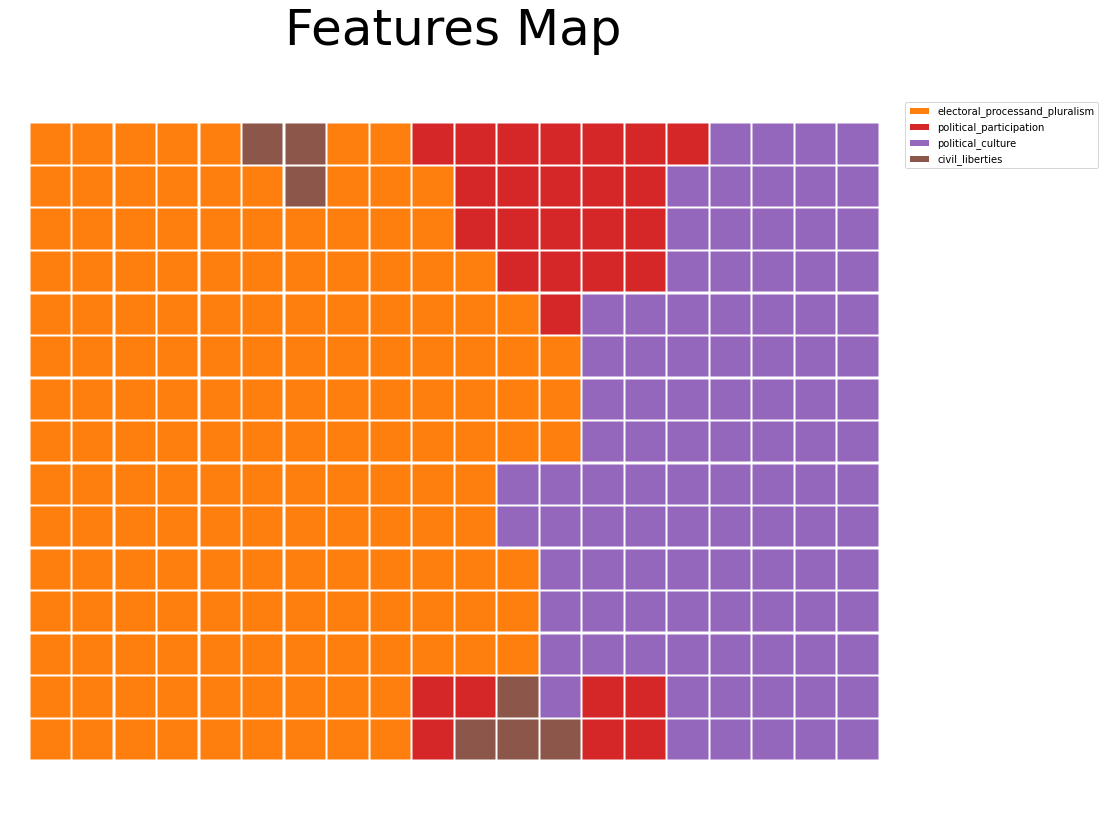

In [107]:
vhts.plot_features_map()

In [ ]:
som.nodes.matrix.shape